<a href="https://colab.research.google.com/github/Sairindhrijena/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name-Health-Insurance-Cross-Sell-Prediction**
**Project Type**-Classification

**Contribution**-Indivisual

# **Project Summary**


*  An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss,damage,illness or death in return for the payment of aspecified premium.

*  By building a model to predict whether a customer would be intrested in Vehicle insurance is extremely helpful for a company.After that it can than accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.


*   We have a dataset which contains information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. related to a person who is interested in vehicle insurance. We have 381109 data points available.












# **GitHub Link :-**

# **Problem Statement:-**

> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.



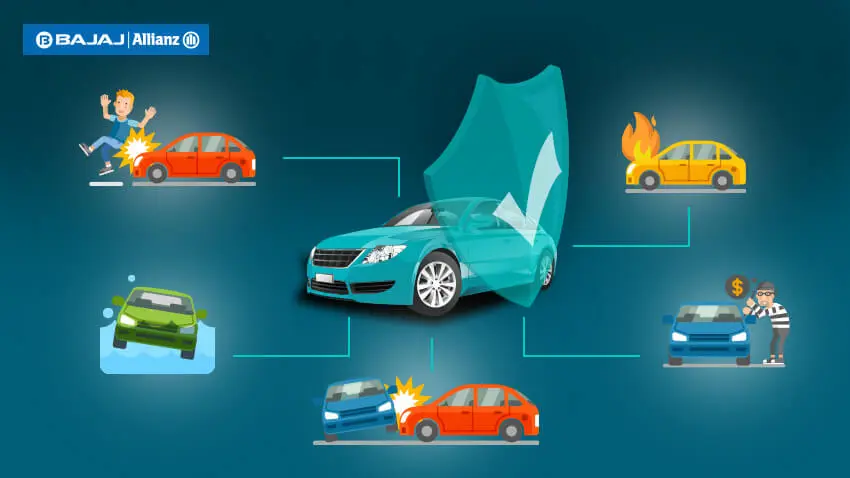

#**Let's Begin**

##**1. Know Your Data**

###**Import Libraries**

In [1]:

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings;warnings.simplefilter('ignore')
import time

###**Dataset Loading**

In [2]:
#Load Dataset
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECT-3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

###**Dataset First View**

In [3]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


###**Dataset Rows & Columns count**

In [4]:

# Dataset Rows & Columns count
rows=data.shape[0]
columns=data.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

The no of rows is 381109 and no of columns is 12


###**Dataset Information**

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


###**Duplicate Values**

In [6]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {data.duplicated().sum()}')

The number of duplicate rows are 0


###**Missing Values/Null Values**

In [7]:
# Missing Values/Null Values Count
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

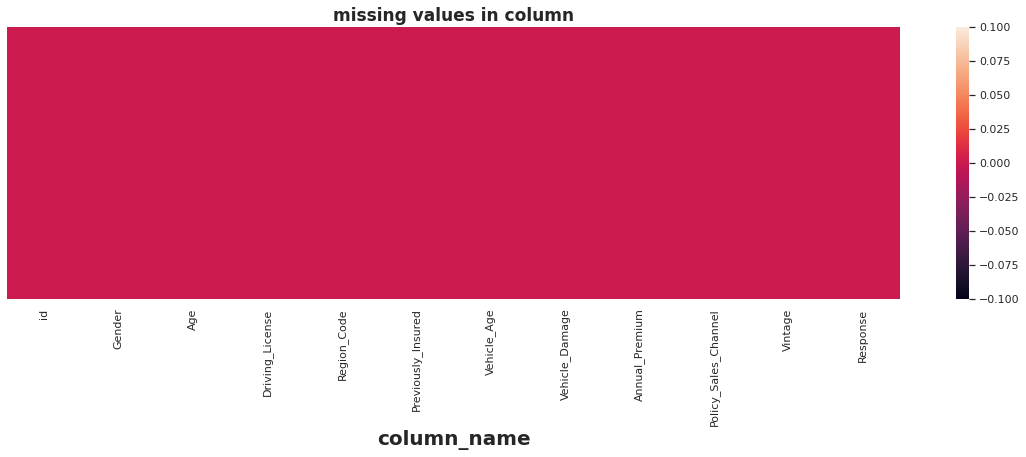

In [8]:
# Visualizing the missing values
plt.figure(figsize=(20, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=20, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

###**What did you know about your dataset?**



*   The dataset given is a dataset from Health Insurance industry, and we have to analysis the response of customers and the insights behind it.
*   Sell prediction is analytical studies on the possibility of a customer abandoning service. The goal is to understand and take steps to change it before the costumer gives up the service.


*   The above dataset has 381109 rows and 12 columns. There are no mising values and duplicate values in the dataset.





# **2. Understanding Your Variables**

In [9]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


###**Dataset Description**



*   **Id:** Unique ID for the customer

*   **Gender:**Male/Female


*    **Age:**Age of the customer

*   **Driving_License:**Customer has DL or not


*   **Region_Code**:Unique code for the region of the customer

*   **Previously_Insured:**Customer already has vehicle insurance or not


*  **Vehicle_Age:**Age of the Vehicle

*   **Vehicle_Damage:**Past Damages present or not

*   **Annual_Premium:**The amount customer needs to pay as premium in the year



*   **PolicySalesChannel:**Anonymized Code for the channel of outreaching to      the customer ie. Different Agents, Over Mail, Over Phone, In Person, 
etc.

*   **Vintage:**Number of Days, Customer has been associated with the company


*   **Response:**Customer is interested or not
















###**Check Unique Values for each variable**

In [11]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

No. of unique values in  id is 381109 .
No. of unique values in  Gender is 2 .
No. of unique values in  Age is 66 .
No. of unique values in  Driving_License is 2 .
No. of unique values in  Region_Code is 53 .
No. of unique values in  Previously_Insured is 2 .
No. of unique values in  Vehicle_Age is 3 .
No. of unique values in  Vehicle_Damage is 2 .
No. of unique values in  Annual_Premium is 48838 .
No. of unique values in  Policy_Sales_Channel is 155 .
No. of unique values in  Vintage is 290 .
No. of unique values in  Response is 2 .


# **3. Data Wrangling**

###**Data Wrangling Code**

In [12]:
# Write your code to make your dataset analysis ready.
# Assingning numericals column of df to variable numerical_cols
num_cols = list(data.describe())
num_data = data[num_cols]
num_data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0


In [13]:
# Assingning catagoricals column of df to variable catagorical_cols
cat_cols=list(set(data.columns)-set(num_cols))
cat_data=data[cat_cols]
cat_data.head()

,Gender,Vehicle_Damage,Vehicle_Age
0,Male,Yes,> 2 Years
1,Male,No,1-2 Year
2,Male,Yes,> 2 Years
3,Male,No,< 1 Year
4,Female,No,< 1 Year


In [14]:
#let's check in each column of categorical_df how namy unique values are present
for column_name in cat_cols:
  print('-'*35)
  print(data[column_name].value_counts(),'\n')
  print('-'*35)

-----------------------------------
Male      206089
Female    175020
Name: Gender, dtype: int64 

-----------------------------------
-----------------------------------
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 

-----------------------------------
-----------------------------------
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 

-----------------------------------


In [15]:
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


###**What all manipulations have you done and insights you found?**


In this dataset nothing to do in wrangling .so i just divided the df in two dfs i.e, numerical_df and categorical_df . numerical_df for all the numericals column and categorical_df is for all the categorical columns and i check the categorical_df then i found there are 3 columns i.e gender, vehicle_age and vehicle_damage and there are 2 unique in gender, 3 unique in vehicle_age and 2 unique in vehicle_damage.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###**Chart-1:** **Countplot on dependent variable i.e Response (Univariate)**

0    334399
1     46710
Name: Response, dtype: int64




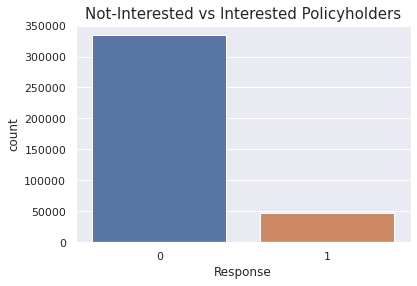

0    0.877437
1    0.122563
Name: Response, dtype: float64

In [16]:
# Chart - 1 visualization code
# Dependent Column Value Counts
print(data.Response.value_counts())
print("\n")
#Dependent Variable Column Visualization
sns.countplot(data.Response)
plt.title('Not-Interested vs Interested Policyholders', fontsize=15)
plt.show()
data.Response.value_counts()/data.shape[0]

 **1. Why did you pick the specific chart?**



*   Countplot used to Show the counts of observations in each categorical bin using bars.
*   To show the count of interested and not-interested of policyholders , So i have used Countplot.

**2. What is/are the insight(s) found from the chart?**



*   The dependant variable has binary values of 0 and 1. We can infer from the plot above that many clients have no interest in purchasing vehicle insurance.


*  12.22 percent of the data are 1's and 87.78 percent of the data are 0's. This data must be handled using the imbalance technique since the output feature is imbalanced.




   **3. Will the gained insights help creating a positive business impact?**



Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights help a positive business impact.


* No, there are no such insights that lead to negative growth.



### **Chart - 2 : Piechart on independent variable i.e Gender (Univariate)**

Male      206089
Female    175020
Name: Gender, dtype: int64




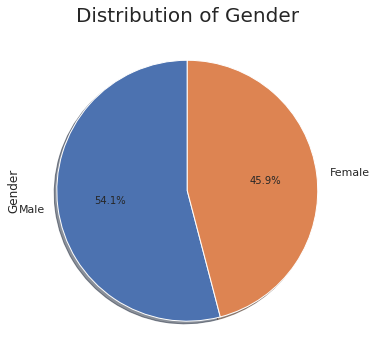

In [17]:
# Chart - 2 visualization code
# Independent Column Value Counts
print(data.Gender.value_counts())
print("\n")
# Independent Variable Column Visualization
data['Gender'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               explode=[0,0]
                              )
plt.title('Distribution of Gender',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.
*   Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Gender.



**2. What is/are the insight(s) found from the chart?**

From the above pie chart i found there are 206089 male i.e (54.1 %) and 175020 female i.e (45.9 %). So , we can say that gender variable is almost equally distributed but male are liitle bit more in comparison to female.

**3.Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*  No, the gained insights help a positive business impact.
*   No, there are no such insights that lead to negative growth

